In [1]:
import sys
#sys.path.append("<InstallPath>\TechnicalDrawingPython")

In [2]:
import numpy as np
import math

In [3]:
from mpl_toolkits import mplot3d
from technicaldrawpy import Transformations,Sahne,Camera,Vertex,Edge,Surface,LinearObject,Cube,Sahnecams

Perspektif projeksiyon yönteminde $\mathbf{p}$ cisim noktasından $\mathbf{p'}$ projeksiyon noktasını hesaplamak için önce perspektif dönüşüm işlemi ardından dik projeksiyon işlemi uygulanmaktadır. Perspektif projeksiyon yönteminin bir, iki veya üç noktalı çeşitleri vardır. En genel biçimde üç noktalı ($x,y,z$ eksenleri üzerindeki odak noktalarının konumları sırayla $c_x < 0, c_y < 0, c_z < 0$ olmak üzere ve projeksiyon düzlemi orijinden geçmek üzere) perspektif projeksiyon yöntemine göre bir $\mathbf{p} > 0$ cisim noktasından $z$ ekseninde dik projeksiyon uygulayarak $\mathbf{p'}$ projeksiyon noktasını hesaplamak için aşağıdaki işlemleri uygulamak gerekir.

$$
\\
\mathbf{p'}=
\mathbf{P_z}\,\mathbf{P_{p}^{xyz}}\,\mathbf{p}
\\
$$
$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
\frac{-1}{c_x} & \frac{-1}{c_y} & \frac{-1}{c_z} & 1
\end{bmatrix}
\begin{bmatrix}
p_x\\
p_y\\
p_z\\
1
\end{bmatrix}
$$

Eğer odak noktalarını orijinden yeterince uzaklaştırırsak,
$$
\\
\mathbf{P_{p}^{xyz}}=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
\frac{-1}{c_x} & \frac{-1}{c_y} & \frac{-1}{c_z} & 1
\end{bmatrix}
\approx
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

olur. Bu durumda $\mathbf{p'}=\mathbf{P_z}\,\mathbf{P_{p}^{xyz}}\,\mathbf{p}$ olduğundan sadece $z$ ekseninde dik projeksiyon uygulayarak sonuç elde edilir. Odak noktalarının merkezden çok uzakta yani sonsuzda yer almasını ışınların paralel olarak geldiği şeklinde yorumlayabiliriz.

Eğer $x$ ve $y$ eksenleri üzerindeki odak noktaları sonsuzda yer alırsa, sadece $z$ eksenindeki odak noktasının perspektif dönüşüm işlemine bir etkisi vardır. İnsan gözünün ve kamera sistemlerinin çalışma prensibine yakın olan bu durumda,

$$
\\
\mathbf{p'}=
\mathbf{P_z}\,\mathbf{P_{p}^{z}}\,\mathbf{p}
\\
$$
$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & \frac{-1}{c_z} & 1
\end{bmatrix}
\begin{bmatrix}
p_x\\
p_y\\
p_z\\
1
\end{bmatrix}
$$

Burada projeksiyon merkez noktasının O orijin noktasından farklı olduğu model kabul edilmiştir.

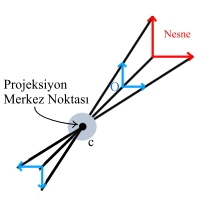

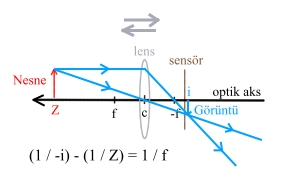

Lens kullanıldığında daha yüksek miktarda ışından görüntü elde etmek mümkündür. Ancak sensör üzerinde oluşan görüntüde cismin uzaklığına bağlı olarak (kamera odağının ayarlanmasına benzer olarak) bulanıklaşma, lensteki geometrik biçim kusurlarına bağlı sapmalar, lens malzemesinin özelliğine bağlı olarak renk tayfı bazında sapmalar gibi çeşitli etkiler oluşması söz konusudur.

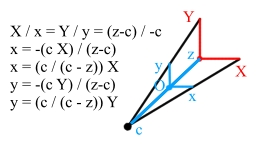

Eğer sağlamasını yapmak gerekirse,

$$
\\
\mathbf{p'}=
\mathbf{P_z}\,\mathbf{P_{p}^{z}}\,\mathbf{p}
\\
$$
$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & \frac{-1}{c_z} & 1
\end{bmatrix}
\begin{bmatrix}
p_x\\
p_y\\
p_z\\
1
\end{bmatrix}
$$

$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
p_x\\
p_y\\
p_z\\
\frac{-p_z}{c_z}+1
\end{bmatrix}
=
\begin{bmatrix}
p_x\\
p_y\\
0\\
\frac{c_z-p_z}{c_z}
\end{bmatrix}
$$

Bu noktayı kartezyen koordinat sistemine uyarlarsak aşağıdaki noktayı buluruz.

$$
\\
\begin{bmatrix}
\frac{c_z}{c_z-p_z}\,p_x\\
\frac{c_z}{c_z-p_z}\,p_y\\
0\\
1
\end{bmatrix}
$$

Projeksiyon merkez noktasının O orijin noktasıyla aynı kabul edildiği model aşağıda gösterilmiştir. Bu model hesaplarda dikkate alınmamıştır. 

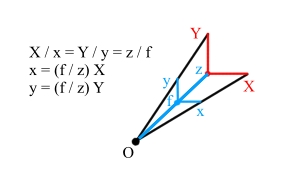

Aşağıdaki küp nesnesi $8$ köşe("vertex"), $12$ kenar("edge") ve $6$ yüzey("surface") elemanından oluşmaktadır.

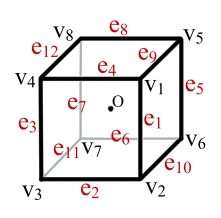

$z$ ekseni hariç diğer eksenlerde odak noktaları sonsuzda bulunan perspektif görüntünün oluşumuna örnek aşağıda verilmiştir.

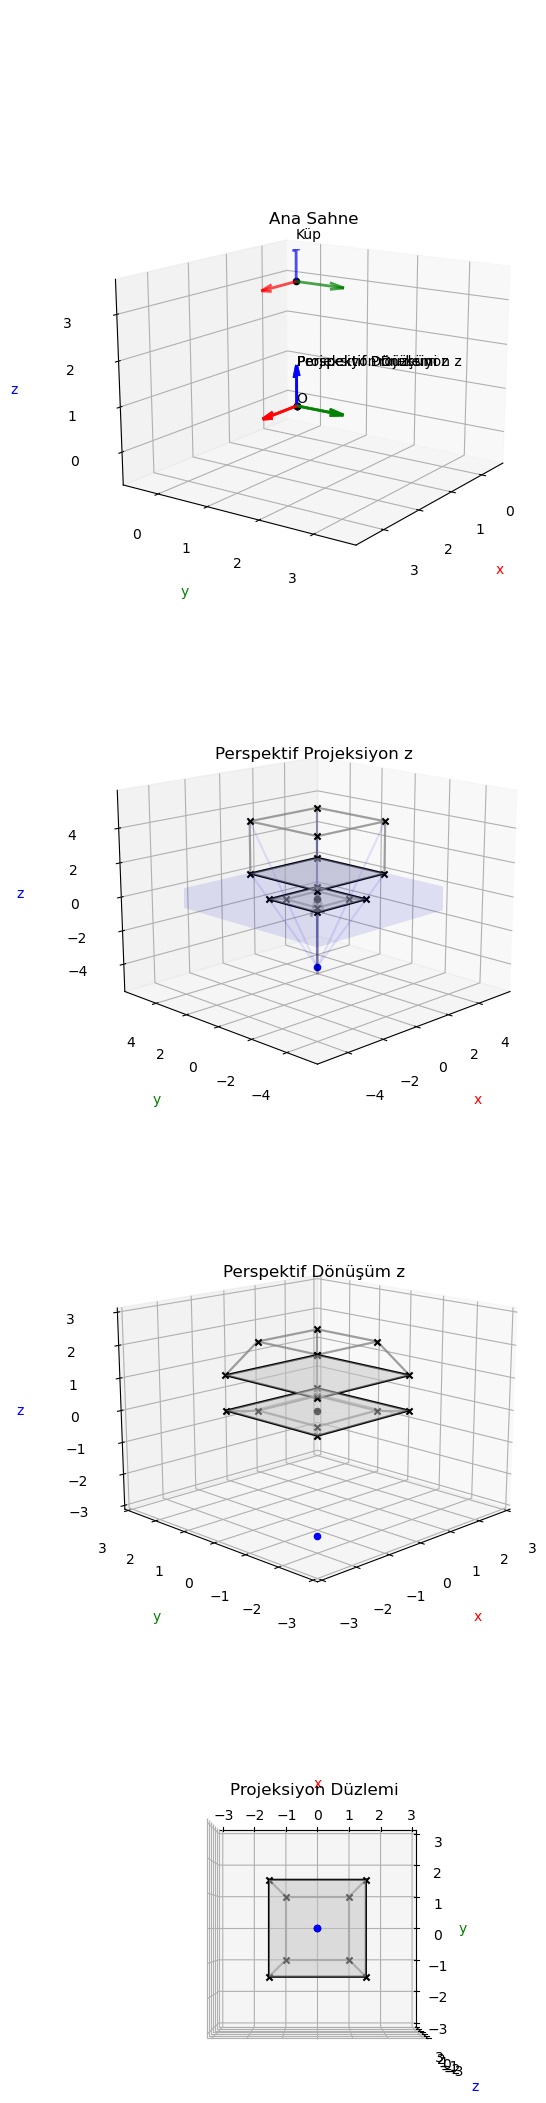

In [4]:
sahneU2_01=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",3) # 3 adet kamera tanımlanacak
sahneU2_01.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU2_01,"Perspektif Projeksiyon z",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-4]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,True,False)
mycam2=Camera.Camera(-135,6,15,sahneU2_01,"Perspektif Dönüşüm z",[-2,2]) # [-2,2] görüş limitleri
mycam2.set_copfocalsxyz([-1000000,-1000000,-4]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,True,True,False,False,False)
mycam3=Camera.Camera(90,8,-90,sahneU2_01,"Projeksiyon Düzlemi",[-2,2])
mycam3.set_copfocalsxyz([-1000000,-1000000,-4]) # -1000000 (at infinity)
mycam3.set_generateviewbools(False,False,True,False,False,False)
sahneU2_01.addcamera(mycam1)
sahneU2_01.addcamera(mycam2)
sahneU2_01.addcamera(mycam3)
mycube=Cube.Cube(4,4,3,sahneU2_01,"Küp") # 4 x 4 x 3 ebatlarında bir küp nesnesi 
mycube.translate_xyz(0,0,3)
sahneU2_01.addobj(mycube)
sahneU2_01.calculate_positions()
sahneU2_01.show()
mycam3.ax.invert_xaxis()

Sadece $z$ eksenindeki odak noktası sonsuzda yer alan perspektif görüntünün oluşumuna örnek aşağıda verilmiştir.

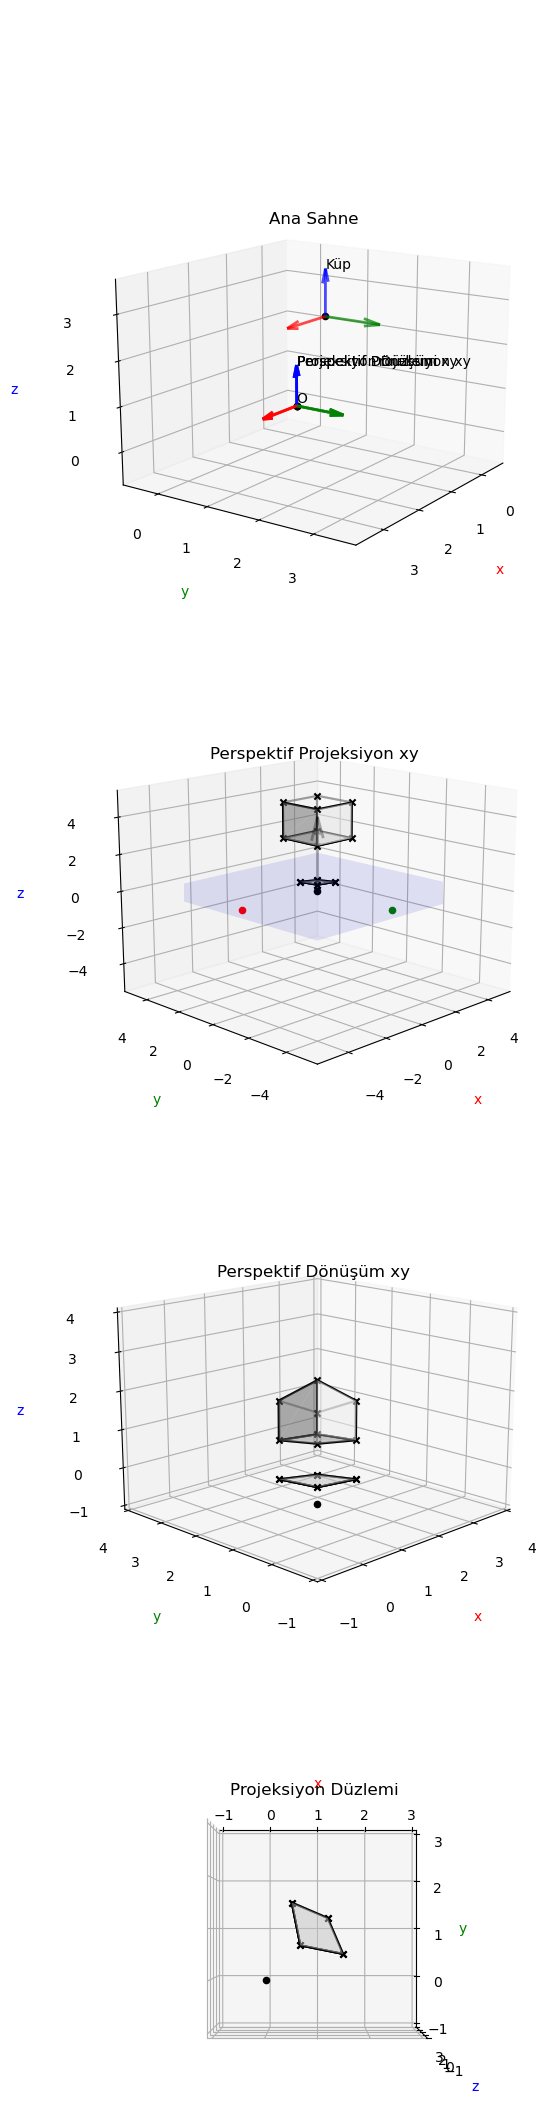

In [5]:
sahneU2_02=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",3) # 3 adet kamera tanımlanacak
sahneU2_02.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU2_02,"Perspektif Projeksiyon xy",None)
mycam1.set_copfocalsxyz([-4,-4,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,False)
mycam2=Camera.Camera(-135,6,15,sahneU2_02,"Perspektif Dönüşüm xy",[0,3])
mycam2.set_copfocalsxyz([-4,-4,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,True,True,False,False,False)
mycam3=Camera.Camera(90,8,-90,sahneU2_02,"Projeksiyon Düzlemi",[0,2])
mycam3.set_copfocalsxyz([-4,-4,-1000000]) # -1000000 (at infinity)
mycam3.set_generateviewbools(False,False,True,False,False,False)
sahneU2_02.addcamera(mycam1)
sahneU2_02.addcamera(mycam2)
sahneU2_02.addcamera(mycam3)
mycube=Cube.Cube(2,2,2,sahneU2_02,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi 
mycube.translate_xyz(2,2,3)
sahneU2_02.addobj(mycube)
sahneU2_02.calculate_positions()
sahneU2_02.show()
mycam3.ax.invert_xaxis()

Hiçbir eksenindeki odak noktası sonsuzda yer almayan perspektif görüntünün oluşumuna örnek aşağıda verilmiştir.

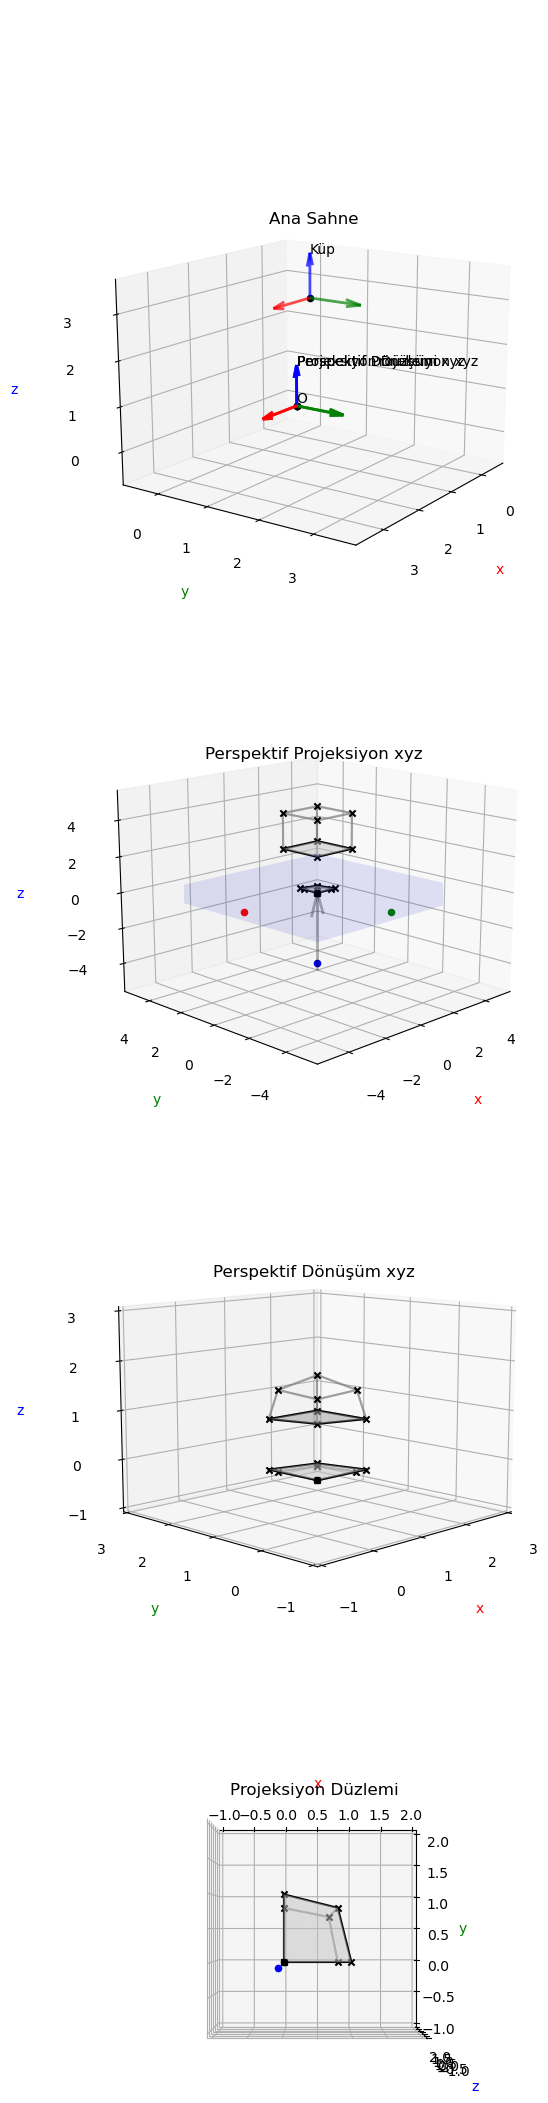

In [6]:
sahneU2_03=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",3) # 3 adet kamera tanımlanacak
sahneU2_03.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU2_03,"Perspektif Projeksiyon xyz",None)
mycam1.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,False)
mycam2=Camera.Camera(-135,6,10,sahneU2_03,"Perspektif Dönüşüm xyz",[0,2])
mycam2.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,True,True,False,False,False)
mycam3=Camera.Camera(90,8,-90,sahneU2_03,"Projeksiyon Düzlemi",[0,1])
mycam3.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
mycam3.set_generateviewbools(False,False,True,False,False,False)
sahneU2_03.addcamera(mycam1)
sahneU2_03.addcamera(mycam2)
sahneU2_03.addcamera(mycam3)
mycube=Cube.Cube(2,2,2,sahneU2_03,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi 
mycube.translate_xyz(1,1,3)
sahneU2_03.addobj(mycube)
sahneU2_03.calculate_positions()
sahneU2_03.show()
mycam3.ax.invert_xaxis()

Eğik("Oblique") projeksiyon yönteminde ışınlar birbirine paralel ve izdüşüm düzlemine eğiktir. Işınlar ile izdüşüm düzleminin normal vektörü arasındaki açıyı $\beta$ olarak tanımlayabiliriz. İzdüşüm düzlemine $z$ mesafesindeki bir $\mathbf{p}$ cisim noktasından izdüşüm düzlemine eğik olarak gelen ışınların izdüşüm düzleminde oluşturduğu $\mathbf{p'}$ projeksiyon noktası dik projeksiyon yönteminden elde edilen projeksiyon noktasına göre bir miktar sapma gösterir. Bu sapmanın izdüşüm düzleminin yatay çizgiyle oluşturduğu açıyı $\alpha$ olarak adlandırabiliriz. Bu sapmanın uzunluğu $d$ olup izdüşüm düzleminin yatayında $dx$ ve dikeyinde $dy$ bileşenlerine sahiptir.
$$
tan(\beta)=\frac{sin(\beta)}{cos(\beta)}=\frac{d}{z}
$$
$$
dx=cos(\alpha)d=cos(\alpha)tan(\beta)z
$$
$$
dy=sin(\alpha)d=sin(\alpha)tan(\beta)z
$$

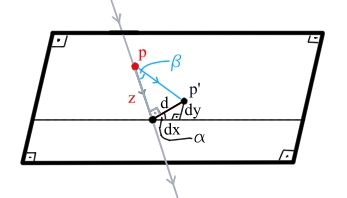

Bir $\mathbf{p}$ pozisyon vektöründen, $(\beta,\alpha)$ açılı $z$ ekseninde eğik projeksiyon yöntemine göre $\mathbf{p'}$ projeksiyon noktası elde etmek için eğik projeksiyon $\mathbf{P_e^z}(\beta,\alpha)$ dönüşümünü takiben dik projeksiyon $(\mathbf{P_z})$ işlemini yapmak gerekir.

$$
\mathbf{p'}=
\mathbf{P_z}\,\mathbf{P_e^z}(\beta,\alpha)\,\mathbf{p}
\\
$$

$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & tan(\beta)cos(\alpha) & 0\\
0 & 1 & tan(\beta)sin(\alpha) & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
p_x\\
p_y\\
p_z\\
1
\end{bmatrix}
$$

$$
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
p_x+p_ztan(\beta)cos(\alpha)\\
p_y+p_ztan(\beta)sin(\alpha)\\
z\\
1
\end{bmatrix}
\\
$$

$$
\\
=
\begin{bmatrix}
p_x+p_ztan(\beta)cos(\alpha)\\
p_y+p_ztan(\beta)sin(\alpha)\\
0\\
1
\end{bmatrix}
=
\begin{bmatrix}
p_x+d_x\\
p_y+d_y\\
0\\
1
\end{bmatrix}
$$

Eğer $\beta=0$ olursa $tan(\beta)=\frac{sin(\beta)}{cos(\beta)}=\frac{0}{1}=0$ olacağından,
$$
\\
\mathbf{P_e^z}(\beta,\alpha)=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$
olur. Bu durumda sadece $z$ ekseninde dik projeksiyon işlemi uygulanmış olunur.

Aşağıda eğik projeksiyon yöntemine bir örnek verilmiştir.

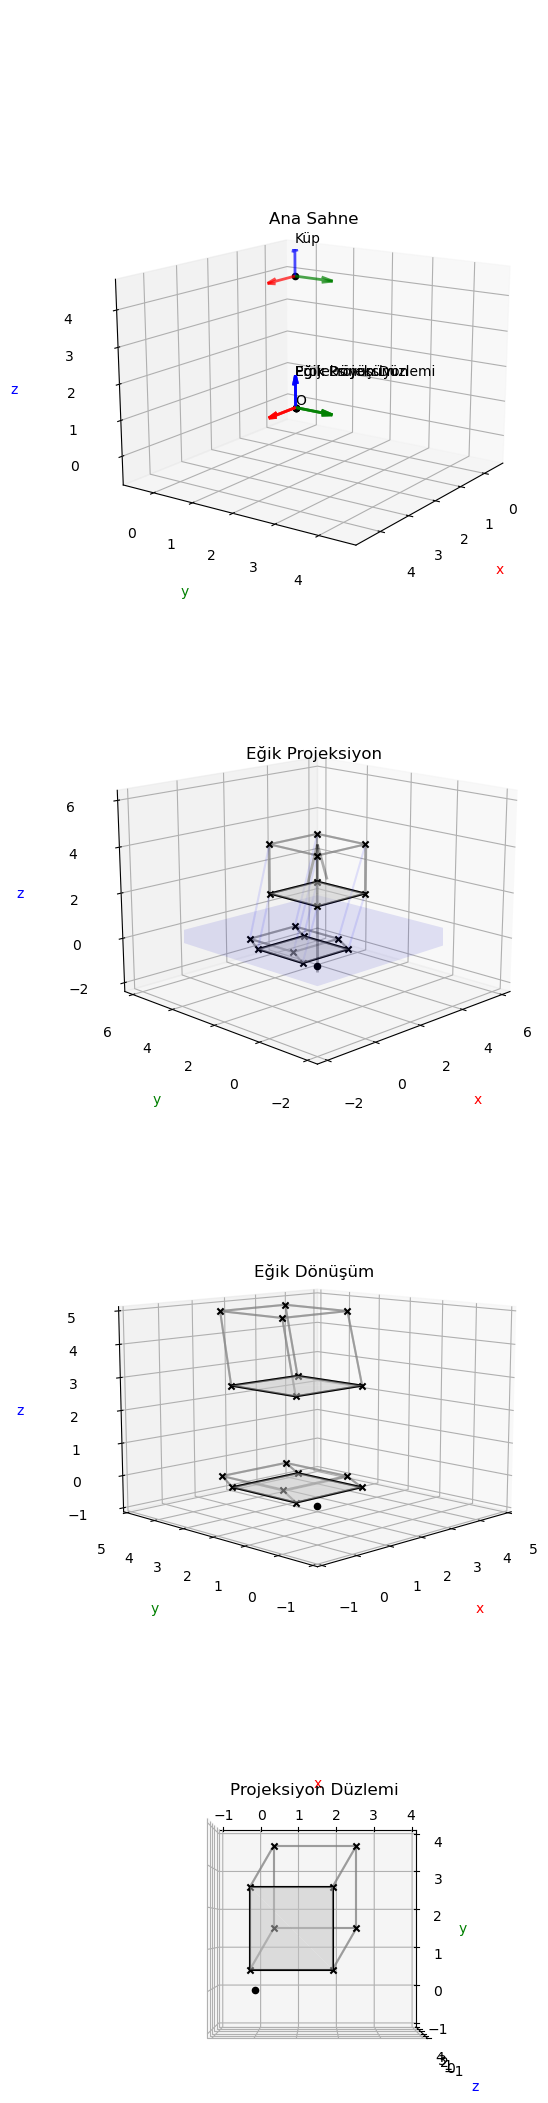

In [7]:
sahneU2_04=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",3)
sahneU2_04.copdistancelimit=5
mycam1=Camera.Camera(-135,6,15,sahneU2_04,"Eğik Projeksiyon",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,True)
mycam2=Camera.Camera(-135,6,10,sahneU2_04,"Eğik Dönüşüm",[0,4])
mycam2.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,True,True,False,False,False)
mycam3=Camera.Camera(90,8,-90,sahneU2_04,"Projeksiyon Düzlemi",[0,3])
mycam3.set_copfocalsxyz([-1000000,-1000000,-1000000]) # -1000000 (at infinity)
mycam3.set_generateviewbools(False,False,True,False,False,False)
sahneU2_04.addcamera(mycam1)
sahneU2_04.addcamera(mycam2)
sahneU2_04.addcamera(mycam3)
mycube=Cube.Cube(2,2,2,sahneU2_04,"Küp")
mycube.translate_xyz(0,0,4)
sahneU2_04.addobj(mycube)
sahneU2_04.calculate_positions_oblique(math.pi/6,math.pi/3) # beta, alpha
sahneU2_04.show()
mycam3.ax.invert_xaxis()

Cisimlerin paralel kenarları perspektif projeksiyonunun odak noktalarından uzaklaştıkça birbirlerine yakınlaşır. Bir cismin düz kenar çizgisinin doğrultusundan yola çıkarak sonsuzdaki bir $\mathbf{p}$ noktasını homojen koordinat sisteminde tanımlamak mümkündür. $\mathbf{p}$ noktasından perspektif projeksiyon yöntemiyle elde edilen $\mathbf{p'}$ noktası, cismin düz kenar çizgisinin projeksiyon düzlemi üzerinde sonlandığı noktadır.

$$
\\
\mathbf{p'}=
\mathbf{P_z}\,\mathbf{P_{p}^{xyz}}\,\mathbf{p}
\\
$$
$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
\frac{-1}{c_x} & \frac{-1}{c_y} & \frac{-1}{c_z} & 1
\end{bmatrix}
\begin{bmatrix}
p_x\\
p_y\\
p_z\\
0
\end{bmatrix}
$$
$$
\\
=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
p_x\\
p_y\\
p_z\\
-(\frac{p_x}{c_x}+\frac{p_y}{c_y}+\frac{p_z}{c_z})
\end{bmatrix}
$$
$$
\\
=
\begin{bmatrix}
p_x\\
p_y\\
0\\
-(\frac{p_x}{c_x}+\frac{p_y}{c_y}+\frac{p_z}{c_z})
\end{bmatrix}
$$
$$
\\
=
\begin{bmatrix}
p_x\\
p_y\\
0\\
-(\frac{p_xc_yc_z+p_yc_xc_z+p_zc_xc_y}{c_xc_yc_z})
\end{bmatrix}
$$

Hesaplanan $\mathbf{p'}$ noktasına kartezyen sistemde karşılık gelen noktayı görebilmek için homojen koordinat sistemi vektöründeki son noktayı $1$'e eşitlemek gerekir.

$$
\\
\begin{bmatrix}
\frac{-p_xc_xc_yc_z}{p_xc_yc_z+p_yc_xc_z+p_zc_xc_y}\\
\frac{-p_yc_xc_yc_z}{p_xc_yc_z+p_yc_xc_z+p_zc_xc_y}\\
0\\
1
\end{bmatrix}
$$

Eğer sadece $z$ eksenindeki odak noktası perspektif projeksiyon hesaplarında kullanılıyorsa,
$$
\\
\mathbf{p'}=
\begin{bmatrix}
p_x\\
p_y\\
0\\
-\frac{p_z}{c_z}
\end{bmatrix}
$$

Hesaplanan $\mathbf{p'}$ noktasına kartezyen sistemde karşılık gelen noktayı görebilmek için homojen koordinat sistemi vektöründeki son noktayı $1$'e eşitlemek gerekir.

$$
\\
\begin{bmatrix}
-c_z\frac{p_x}{p_z}\\
-c_z\frac{p_y}{p_z}\\
0\\
1
\end{bmatrix}
$$

Bu noktada $p_z=0$ olduğunda,
$$
\\
\mathbf{p'}=\pm
\begin{bmatrix}
p_x\\
p_y\\
0\\
0
\end{bmatrix}
$$
sonsuzda yer almaktadır.

Ayrıca $p_y=0$ ve $p_z\neq0$ ise $\mathbf{p'}$ noktası ufukta belirmektedir.
$$
\\
\begin{bmatrix}
-c_z\frac{p_x}{p_z}\\
0\\
0\\
1
\end{bmatrix}
$$

Üç noktalı merkezi projeksiyon yönteminde bir cismin düz kenar çizgilerinin projeksiyon düzlemi üzerinde sonlandığı noktaları gösteren bir örnek aşağıda yer almaktadır.

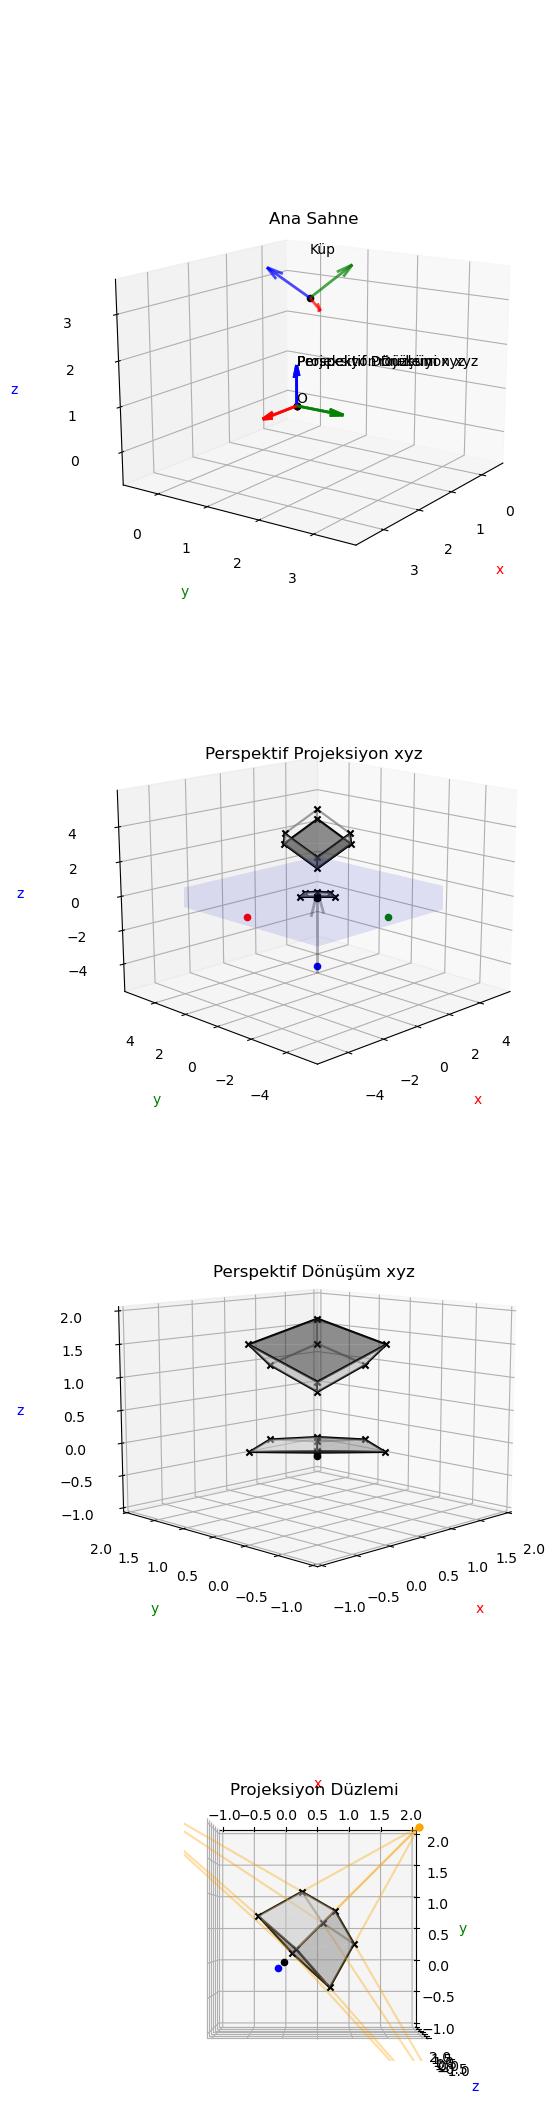

In [8]:
sahneU2_05=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",3) # 3 adet kamera tanımlanacak
sahneU2_05.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU2_05,"Perspektif Projeksiyon xyz",None)
mycam1.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,False)
mycam2=Camera.Camera(-135,6,10,sahneU2_05,"Perspektif Dönüşüm xyz",[0,1])
mycam2.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,True,True,False,False,False)
mycam3=Camera.Camera(90,8,-90,sahneU2_05,"Projeksiyon Düzlemi",[0,1])
mycam3.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
mycam3.set_generateviewbools(False,False,True,True,False,False)
sahneU2_05.addcamera(mycam1)
sahneU2_05.addcamera(mycam2)
sahneU2_05.addcamera(mycam3)
mycube=Cube.Cube(2,2,2,sahneU2_05,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
mycube.rotate_x(math.pi/4)
mycube.rotate_z(math.pi/4)
mycube.translate_xyz(1,1,3)
sahneU2_05.addobj(mycube)
sahneU2_05.calculate_positions()
sahneU2_05.show()
mycam3.ax.invert_xaxis()

Üç noktalı merkezi projeksiyon yönteminde bir cismin düz kenar çizgilerinin projeksiyon düzlemi üzerinde sonlandığı noktaları gösteren başka bir örnek aşağıda yer almaktadır.

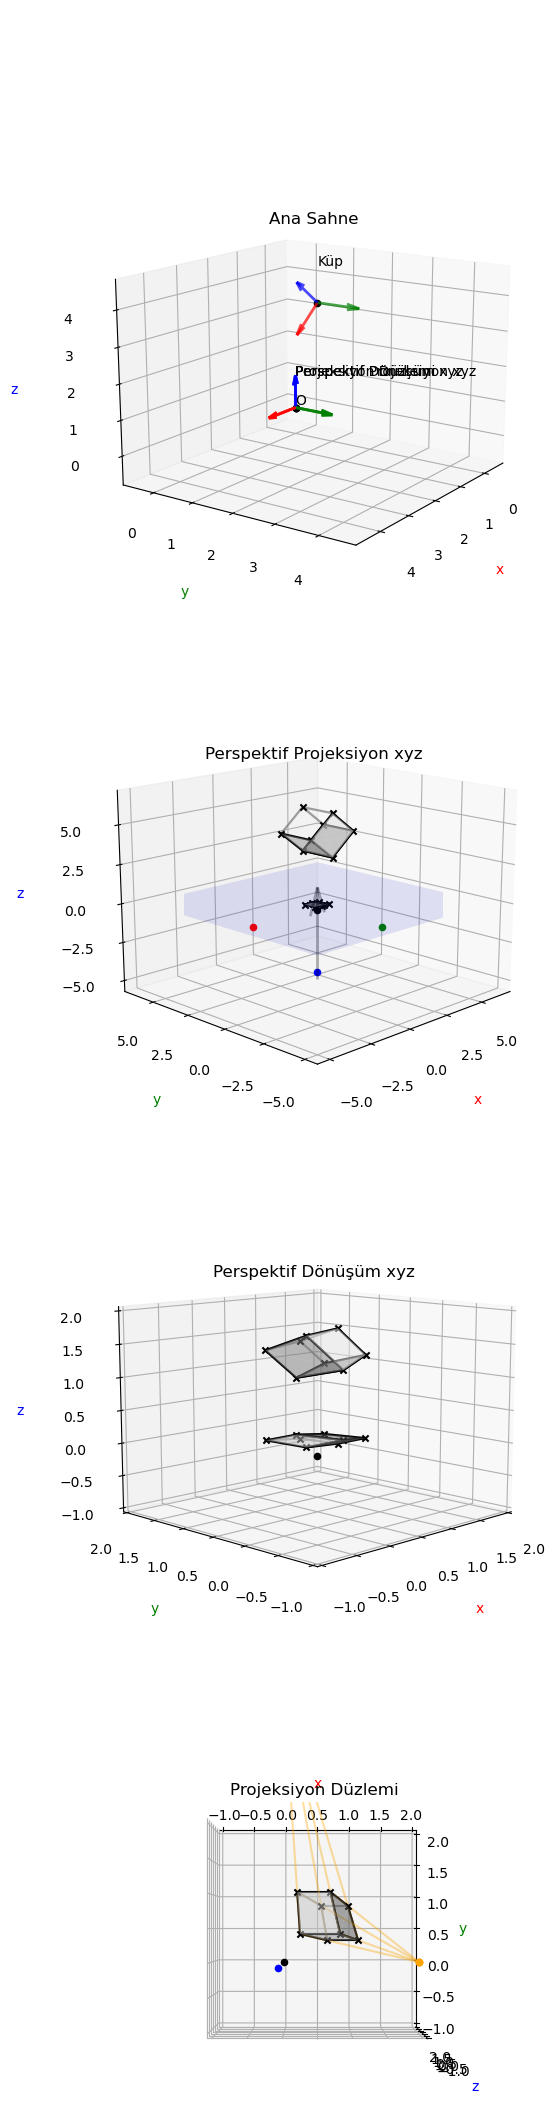

In [9]:
sahneU2_06=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",3) # 3 adet kamera tanımlanacak
sahneU2_06.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU2_06,"Perspektif Projeksiyon xyz",None)
mycam1.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,False)
mycam2=Camera.Camera(-135,6,10,sahneU2_06,"Perspektif Dönüşüm xyz",[0,1])
mycam2.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,True,True,False,False,False)
mycam3=Camera.Camera(90,8,-90,sahneU2_06,"Projeksiyon Düzlemi",[0,1])
mycam3.set_copfocalsxyz([-4,-4,-4]) # -1000000 (at infinity)
mycam3.set_generateviewbools(False,False,True,True,False,False)
sahneU2_06.addcamera(mycam1)
sahneU2_06.addcamera(mycam2)
sahneU2_06.addcamera(mycam3)
mycube=Cube.Cube(2,2,2,sahneU2_06,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
mycube.rotate_y(math.pi/4)
mycube.translate_xyz(2,2,4)
sahneU2_06.addobj(mycube)
sahneU2_06.calculate_positions()
sahneU2_06.show()
mycam3.ax.invert_xaxis()

Yukarıdaki örnekte üç paralel kenar grubundan birinde, paralel kenar çizgilerinin projeksiyon düzlemi üzerinde sonlandığı nokta sonsuzda yer almaktadır.

Tek noktalı merkezi projeksiyon yönteminde bir cismin düz kenar çizgilerinin projeksiyon düzlemi üzerinde sonlandığı noktaları gösteren diğer bir örnek aşağıda yer almaktadır.

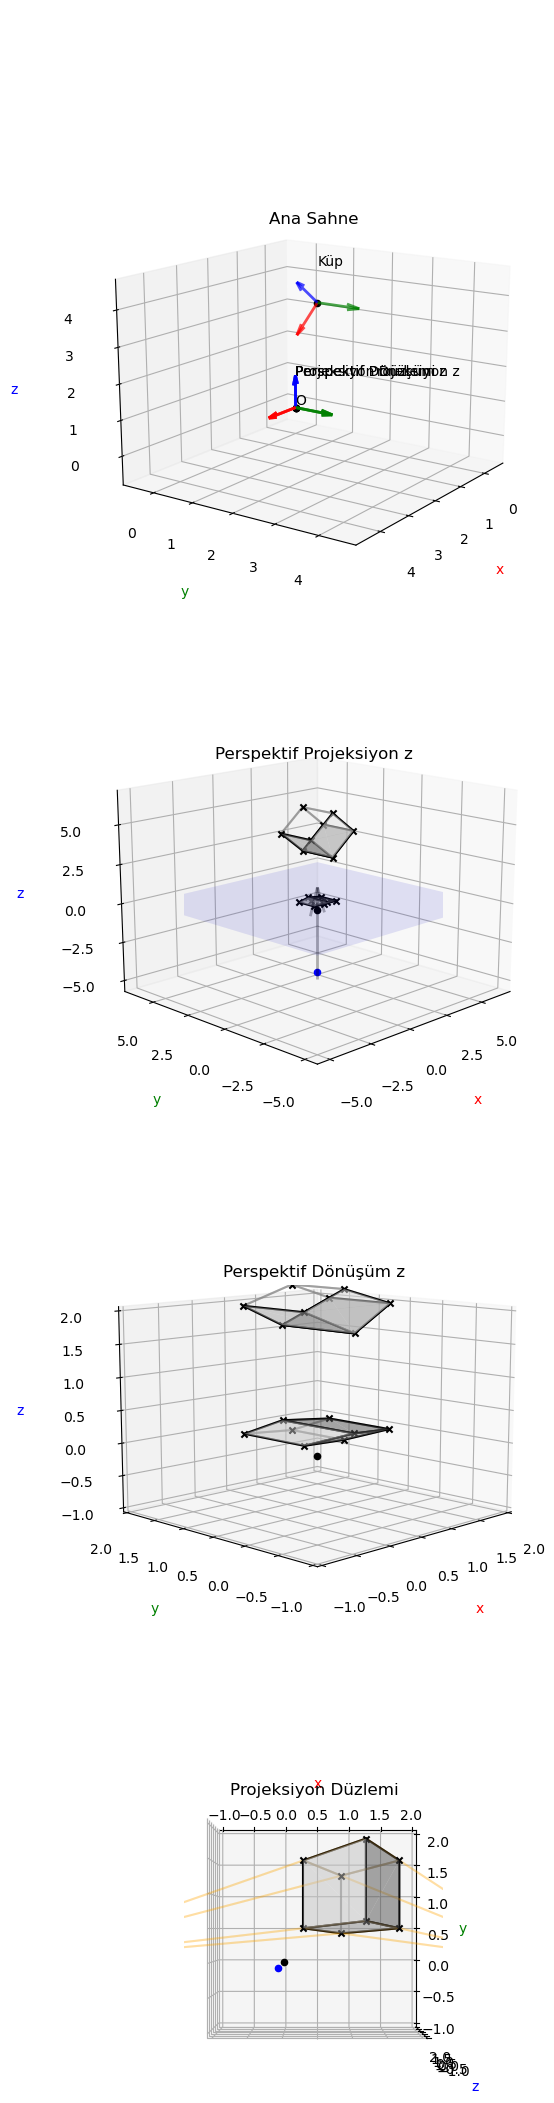

In [10]:
sahneU2_07=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",3) # 3 adet kamera tanımlanacak
sahneU2_07.copdistancelimit=5 # projeksiyon merkez noktası O noktasına 5 birimden daha uzaksa gösterilmeyecek 
mycam1=Camera.Camera(-135,6,15,sahneU2_07,"Perspektif Projeksiyon z",None)
mycam1.set_copfocalsxyz([-1000000,-1000000,-4]) # -1000000 (at infinity)
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1.set_generateviewbools(True,False,True,False,False,False)
mycam2=Camera.Camera(-135,6,10,sahneU2_07,"Perspektif Dönüşüm z",[0,1])
mycam2.set_copfocalsxyz([-1000000,-1000000,-4]) # -1000000 (at infinity)
mycam2.set_generateviewbools(False,True,True,False,False,False)
mycam3=Camera.Camera(90,8,-90,sahneU2_07,"Projeksiyon Düzlemi",[0,1])
mycam3.set_copfocalsxyz([-1000000,-1000000,-4]) # -1000000 (at infinity)
mycam3.set_generateviewbools(False,False,True,True,False,False)
sahneU2_07.addcamera(mycam1)
sahneU2_07.addcamera(mycam2)
sahneU2_07.addcamera(mycam3)
mycube=Cube.Cube(2,2,2,sahneU2_07,"Küp") # 2 x 2 x 2 ebatlarında bir küp nesnesi
mycube.rotate_y(math.pi/4)
mycube.translate_xyz(2,2,4)
sahneU2_07.addobj(mycube)
sahneU2_07.calculate_positions()
sahneU2_07.show()
mycam3.ax.invert_xaxis()

Yukarıdaki örnekte üç paralel kenar grubundan birinde, paralel kenar çizgilerinin projeksiyon düzlemi üzerinde sonlandığı nokta sonsuzda yer almaktadır.